<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 13** | Regressão II | Exercício 2

Aluno [Marcio da Silva](https://github.com/marciolws)<br>
Data: 07 de agosto de 2024.

---

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [61]:
#Importando as bibliotecas que serão utilizadas.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
#Import da base de dados.

df = pd.read_csv('previsao_de_renda.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [64]:
#Aqui irei ealizar a limpeza da base de dados. Vamos fazer a exclusão das linhas que possuem dados faltantes.

df = df.dropna()

#Aqui, vamos eliminar as linhas com dados duplicados.

df = df.drop_duplicates()

#Por fim, realizo o reset do index.

df = df.reset_index()

In [65]:
#Convertendo as colunas posse_de_veiculo e posse_de_imovel em int.

df.posse_de_veiculo = [int(x) for x in df.posse_de_veiculo]
df.posse_de_imovel = [int(x) for x in df.posse_de_imovel]

#Removendo as colunas que não serão utilizadas no modelo.

df = df.drop(columns=['index', 'Unnamed: 0', 'data_ref', 'id_cliente'])

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

#### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [66]:
#Variáveis explicativas.

X = df.drop(columns=['renda']).copy()

#Variável respostas.

y = df[['renda']]

In [67]:
#Usando o skitlearn, vamos realizar a separação da base de dados.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873, train_size=0.75)

In [68]:
df_treinamento = pd.concat([X_train, y_train], axis=1)
df_teste = pd.concat([X_test, y_test], axis=1)

#### 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [69]:
modelo = 'renda ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

In [70]:
#Listagem com os alphas que serão testados.

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

#Laço de repetição iterando sobre a lista de alphas

for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                         refit=True,
                         L1_wt=0.001, #Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero.
                         alpha=i)
    # print(reg.summary())
    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.001
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.005
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.01
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.05
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.1
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308



Entre os modelos de regressão com regularização ridge testados, o que obteve o melhor coeficiente de determinação foi aquele que utilizou um valor de alpha igual a 0.000, resultando em um 𝑅2 de 0.262434.

#### 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [71]:
#Laço de repetição iterando sobre a lista de alphas.

for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                         refit=True,
                         L1_wt=1, #Na regularização Lasso, o valor de L1_wt deve ser igual a 1.
                         alpha=i)
    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.001
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.005
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.01
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.05
R²: 0.279
R² Ajustado: 0.2739
AIC: 63621.6531

Alpha: 0.1
R²: 0.279
R² Ajustado: 0.2739
AIC: 63621.6531



Dentre os modelos de regressão com regularização LASSO testados, aquele que utilizou um valor de alpha igual a 0.050 obteve o melhor coeficiente de determinação, com um 𝑅2 de 0.2625.

#### 4. Rode um modelo stepwise. Avalie o  na base de testes. Qual o melhor resultado?

In [72]:
#Como a modelagem stepwise não aceita variáveis categóricas, utiliza-se o getdummies para transforma-las.

X_test_1 = pd.get_dummies(X_test)
X_train_1 = pd.get_dummies(X_train)

#Novo dataframe com as dummies.

df_teste_1 = pd.concat([X_test_1, y_test], axis=1)
df_treinamento_1 = pd.concat([X_train_1, y_train], axis=1)

In [73]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X_test_1, y_test)

print('resulting features:')
print(variaveis)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
X = df_dummies[variaveis]
y = df_dummies['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_pred = sm.OLS(y_train, X_train).fit().predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred)}')

R-squared: 0.2901022789972606


In [ ]:
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_y_pred = []

for alpha in alphas:
    md = sm.OLS(y_train, X_train)
    reg = md.fit_regularized(method='elastic_net', 
                             refit=True, 
                             L1_wt=0,  # ridge fit
                             alpha=alpha)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    r2_y_pred.append(r2)
    print(f'Alpha {alpha}: \nR-squared = {r2}\n')
    
pd.DataFrame({'alpha':alphas, 
              '𝑅2':r2_y_pred
             }).sort_values(by='𝑅2', ascending=False)

Alpha 0: 
R-squared = 0.2901022789972607

Alpha 0.001: 
R-squared = 0.29028250824460555

Alpha 0.005: 
R-squared = 0.29085279202395053

Alpha 0.01: 
R-squared = 0.29134419924845734

Alpha 0.05: 
R-squared = 0.29077212194567637

Alpha 0.1: 
R-squared = 0.2852113384999606



,alpha,𝑅2
3,0.010,0.291344
2,0.005,0.290853
4,0.050,0.290772
1,0.001,0.290283
0,0.000,0.290102
5,0.100,0.285211


In [ ]:
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_y_pred = []

for alpha in alphas:
    md = sm.OLS(y_train, X_train)
    reg = md.fit_regularized(method='elastic_net', 
                             refit=True, 
                             L1_wt=1,  # lasso fit
                             alpha=alpha)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    r2_y_pred.append(r2)
    print(f'Alpha {alpha}: \nR-squared = {r2}\n')
    
pd.DataFrame({'alpha':alphas, 
              '𝑅2':r2_y_pred
             }).sort_values(by='𝑅2', ascending=False)

Alpha 0: 
R-squared = 0.2901022789972606

Alpha 0.001: 
R-squared = 0.2901022789972606

Alpha 0.005: 
R-squared = 0.2901022789972606

Alpha 0.01: 
R-squared = 0.2901022789972606

Alpha 0.05: 
R-squared = 0.2901022789972606

Alpha 0.1: 
R-squared = 0.2901022789972606



,alpha,𝑅2
0,0.000,0.290102
1,0.001,0.290102
2,0.005,0.290102
3,0.010,0.290102
4,0.050,0.290102
5,0.100,0.290102


Ao meu ver, o melhor resultado dos modelos stepwise foi o que utilizou a regressão LASSO, pois obteve desempenho semelhante em todos os valores de alpha e ainda assim alcançou um coeficiente de determinação comparável ao modelo que utilizou a regularização ridge com o maior valor desse coeficiente. Dessa forma, esse modelo pode ser considerado mais simples e, ao mesmo tempo, apresentar o melhor resultado entre as opções desenvolvidas.

#### 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

A melhor opção dentre os modelos mencionados é o modelo de regressão LASSO com seleção de variáveis do tipo stepwise. Mesmo utilizando um número menor de variáveis em comparação aos outros modelos, este modelo foi capaz de obter o maior coeficiente de determinação, apresentando pouca variação nos resultados entre os parâmetros.

#### 6. Partindo dos modelos que você ajustou, tente melhorar o  na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [ ]:
#Para tentar melhorar o valor de R², colocarei variável resposta em log e remover as variáveis que não estão ajudando o modelo.

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     265.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          5.62e-275
Time:                        16:58:00   Log-Likelihood:                -3386.3
No. Observations:                3107   AIC:                             6787.
Df Residuals:                    3101   BIC:                             6829.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

Ao colocar o ln na variável resposta o valor de R² passou para 0.340.

In [ ]:
#Incluindo o valor de C(tipo_residencia)[T.Casa] continua fazendo parte do modelo, mas seu valor de p-value está acima de 5% irei remove-lo do modelo.

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.18e-278
Time:                        16:58:38   Log-Likelihood:                -3375.9
No. Observations:                3107   AIC:                             6768.
Df Residuals:                    3100   BIC:                             6816.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

A remoção da variável aumentou o valor de R², R² ajustado e AIC.

In [ ]:
#Como qtd_filhos também apresenta p-value acima de 5%, ela também será removido da modelagem.

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.22e-278
Time:                        16:59:00   Log-Likelihood:                -3376.7
No. Observations:                3107   AIC:                             6769.
Df Residuals:                    3100   BIC:                             6818.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

Sua remoção não alterou muito o valor de R², R² ajustado e AIC. Contudo, fez com que qt_pessoas_residencia apresentasse p-value acima de 5%.

In [ ]:
#Removendo qt_pessoas_residencia.

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     270.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.47e-279
Time:                        17:00:10   Log-Likelihood:                -3377.3
No. Observations:                3107   AIC:                             6769.
Df Residuals:                    3101   BIC:                             6811.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

A remoção das últimas duas variáveis não tiveram efeito significativo sobre o valor de R², R² ajustado e AIC. Portanto, não temos mais variáveis com p-value acima de 5%. Além disso, a remoção dessas variáveis torna o modelo mais simples, o que é muito bom. Simplificar o modelo sempre é interessante para modelagem.

In [74]:
for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                            refit=True,
                            L1_wt=0.001, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                            alpha=i)

    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.001
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.005
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.01
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.05
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.1
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308



Utilizando a modelagem com Ridge o valor de R² obtido foi menor que de Lasso.

#### 7. Ajuste uma árvore de regressão e veja se consegue um  melhor com ela.

In [76]:
#Modelo de regressão.

regr_1 = DecisionTreeRegressor(max_depth=20) # É a profundidade que apresenta o maior valor de R²

regr_1.fit(X_train_1, y_train) # Aqui eu preciso usar a base de dados com o get_dummies

#Obtenção do R².

mse1 = regr_1.score(X_train_1, y_train)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))

O R² da árvore com profundidade=20 é: 0,82


In [78]:
#Utilizando o ccp que pondera a complexidade da árvore, que ajuda a fazer a poda da árvore

path = regr_1.cost_complexity_pruning_path(X_train_1, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Impureza total das folhas')

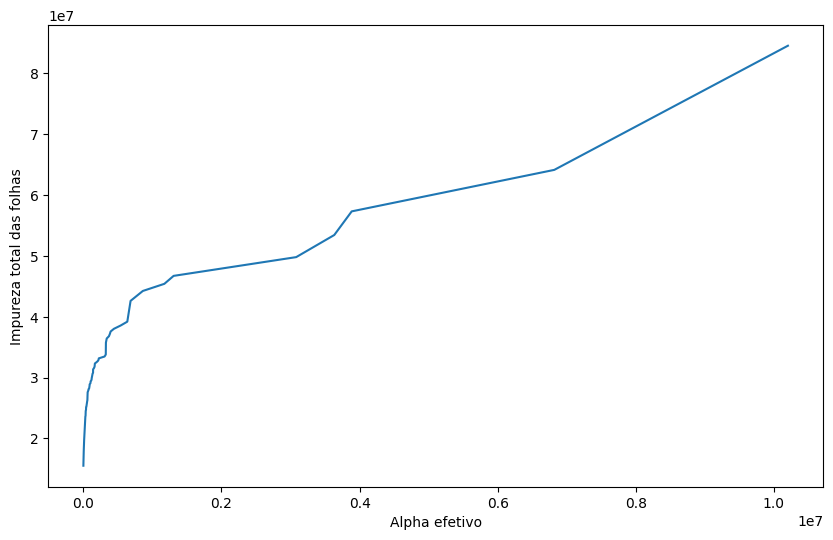

In [79]:
#Plotando os resultados obtidos acima.

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

Text(0, 0.5, 'Profundidade da árvore')

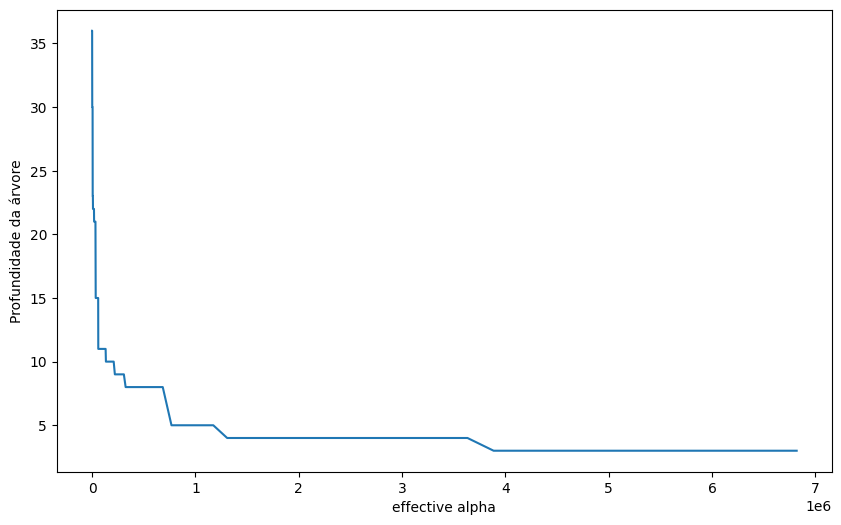

In [83]:
clfs = []

# Looping para construir uma nova árvore para cada ccp

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_1, y_train)
    clfs.append(clf)

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

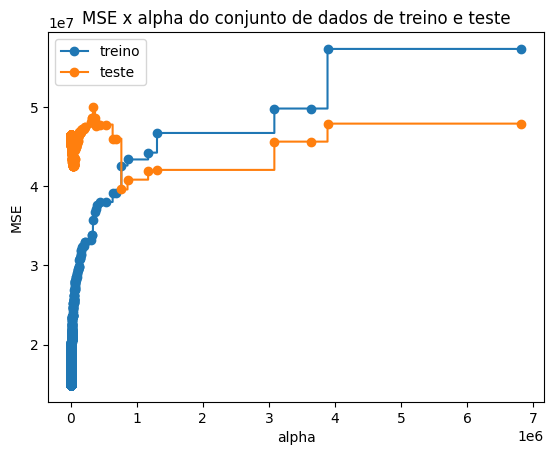

In [85]:
#MSE para cada alpha (List compreension)

train_scores = [mean_squared_error(y_train , clf.predict(X_train_1)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test_1)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=700000)
arvore_final.fit(X_train_1, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test_1, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test_1)):.2f}')

Profundidade: 5
R-quadrado na base de testes: 0.37
MSE na base de testes: 39584101.65


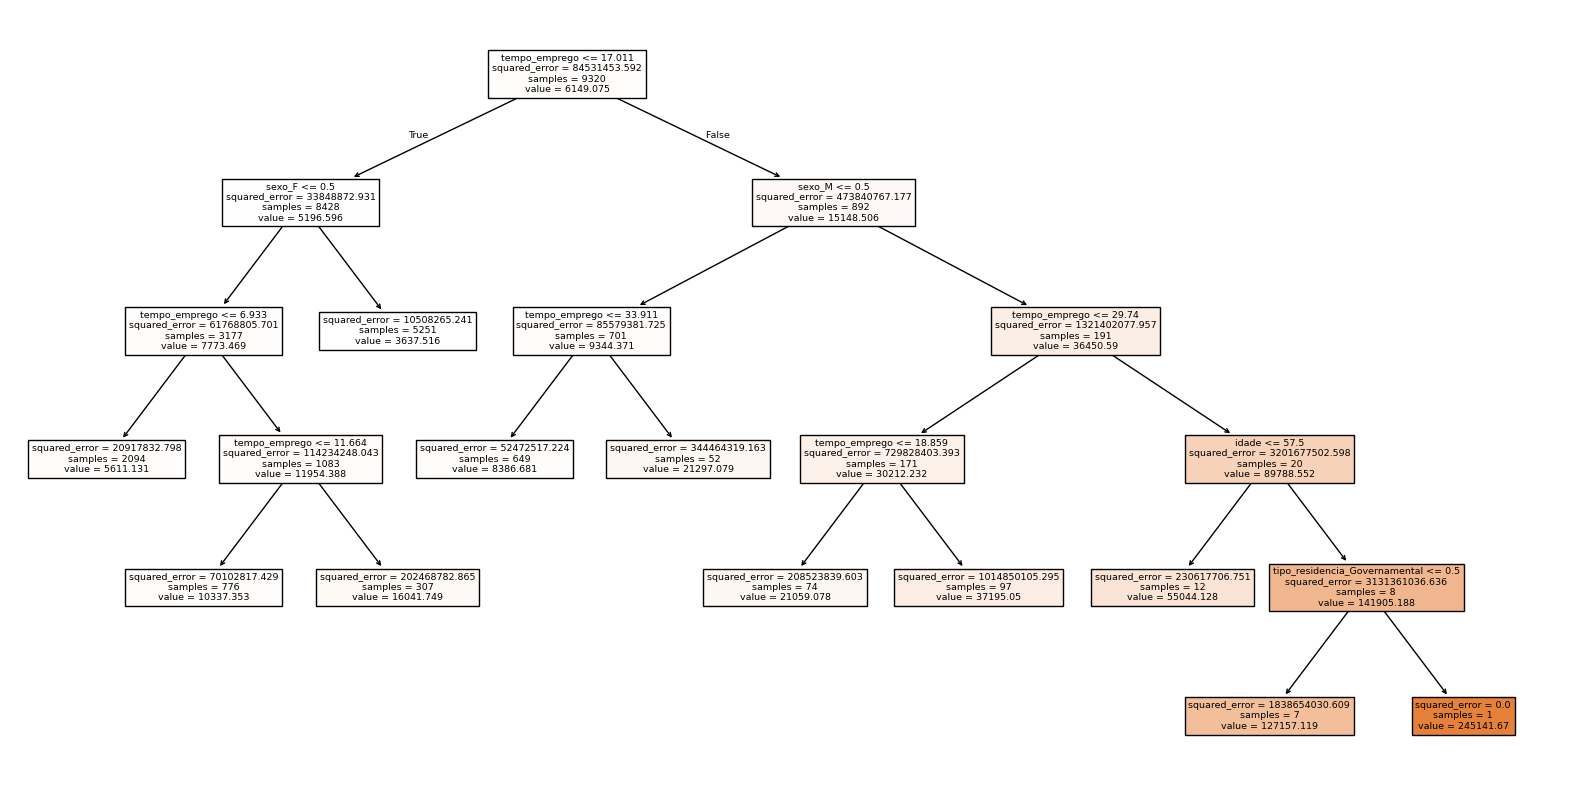

In [87]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(arvore_final,
                    feature_names=X_train_1.columns,
                    filled=True)

Realizando um modelo de árvore de regressão o valor de R² obtido foi de 0.37, este valor é maior que os valores obtidos nos modelos de regressão acima.